In [2]:
import tensorflow as tf
import pandas
import sklearn
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Dropout

2024-01-10 16:47:11.633858: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 16:47:11.862295: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 16:47:11.862341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 16:47:11.873408: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 16:47:11.944709: I tensorflow/core/platform/cpu_feature_guar

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
def print_Examples(x_train, y_train):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(x_train[i])
        plt.title("The label is " + str(y_train[i]))
        plt.axis("off")
        

In [5]:


def model(input_shape, num_classes,x_train, y_train,x_test,y_test, epochs):
    model = Sequential([ 
        layers.Rescaling(1./255, input_shape=input_shape), 
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2,2)), 
        layers.Dropout(0.25), 
        layers.Flatten(), 
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5), 
        layers.Dense(num_classes, activation="softmax") 
    ]) 
    
    model.compile(optimizer='adam', 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=['accuracy']) 

    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    model.summary() 
    
    hist = model.fit(x_train,
    y_train,
    batch_size=32,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping,checkpoint])
    return model,hist


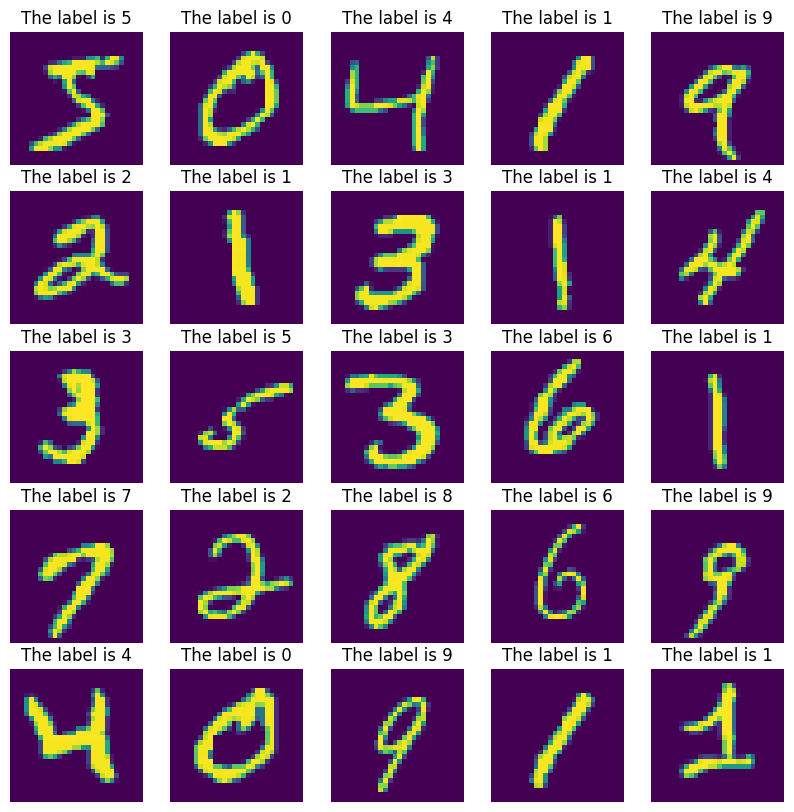

In [6]:
print_Examples(x_train, y_train)

In [7]:

epochs=30
model,hist = model((28,28,1), 10,x_train,y_train,x_test, y_test,epochs)


2024-01-10 16:47:20.035099: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

2024-01-10 16:47:20.187341: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 16:47:20.187390: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 16:47:20.190228: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 16:47:20.190264: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-10 16:47:20.190280: I external/local_xla/xla/stream_executor

Epoch 1/30


/home/himanshu/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-01-10 16:47:22.942229: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-10 16:47:25.278591: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-10 16:47:26.453121: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-10 16:47:26.934743: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-1

1874/1875 [============================>.] - ETA: 0s - loss: 0.3081 - accuracy: 0.9081
Epoch 1: val_accuracy improved from -inf to 0.98050, saving model to best_model.h5
1875/1875 [==============================] - 26s 10ms/step - loss: 0.3080 - accuracy: 0.9081 - val_loss: 0.0587 - val_accuracy: 0.9805
Epoch 2/30
   5/1875 [..............................] - ETA: 25s - loss: 0.1560 - accuracy: 0.9688

/home/himanshu/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1870/1875 [============================>.] - ETA: 0s - loss: 0.1298 - accuracy: 0.9624
Epoch 2: val_accuracy improved from 0.98050 to 0.98730, saving model to best_model.h5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1299 - accuracy: 0.9624 - val_loss: 0.0417 - val_accuracy: 0.9873
Epoch 3/30
1869/1875 [============================>.] - ETA: 0s - loss: 0.1059 - accuracy: 0.9696
Epoch 3: val_accuracy improved from 0.98730 to 0.98750, saving model to best_model.h5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1059 - accuracy: 0.9696 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 4/30
1870/1875 [============================>.] - ETA: 0s - loss: 0.0908 - accuracy: 0.9746
Epoch 4: val_accuracy improved from 0.98750 to 0.98940, saving model to best_model.h5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0910 - accuracy: 0.9746 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 5/30
1870/1875 [============================>.] - E

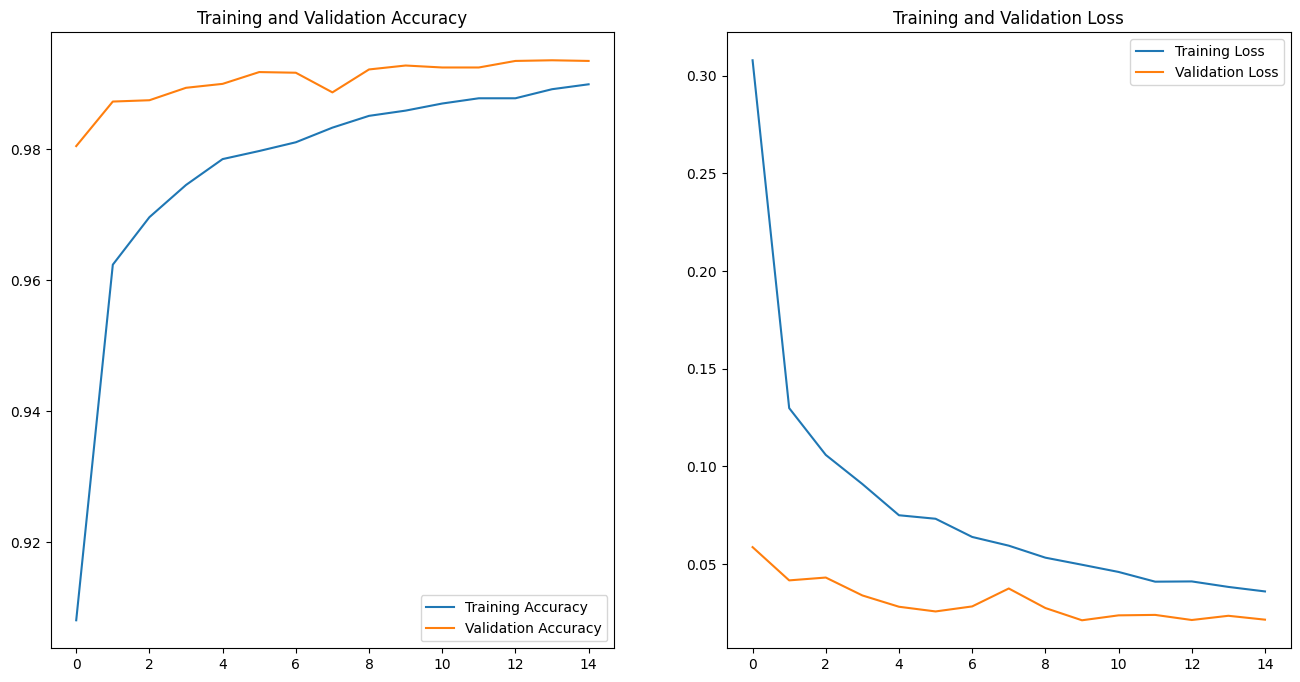

In [8]:
#Accuracy 
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 

#loss 

loss = hist.history['loss'] 
val_loss = hist.history['val_loss'] 

#epochs 
epochs_range = range(len(acc))

#Plotting graphs 
plt.figure(figsize=(16, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 

plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 


In [9]:
results = model.evaluate(x_test, y_test, batch_size=128)
results[1]

79/79 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.9935


0.9934999942779541

In [10]:
model.save(f'model{results[1]}.h5',overwrite=True)

In [11]:
import os
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('best_model.h5')

# Evaluate the model to get the validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

# Rename the model file
os.rename('best_model.h5', f'model{val_acc}.h5')


  5/313 [..............................] - ETA: 4s - loss: 0.0037 - accuracy: 1.0000 

/home/himanshu/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 2s 5ms/step - loss: 0.0235 - accuracy: 0.9936
